# Visualização de dados | Covid-19 Brasil

*Os dados usados aqui foram extraidos em maio de 2020 no portal do [ministério da saúde](https://covid.saude.gov.br/).*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_covidBr = pd.read_excel('HIST_PAINEL_COVIDBR_21mai2020.xlsx')

Vou visualizar o geral pra saber o que contém de dados

In [ ]:
df_covidBr.head()

Posso perceber que tem informações de covid sobre estado, município, região e que as informações liberadas são sempre relacionadas ao dia anterior. Além disso tem muitos dados nulos nesse dataframe. 

**Tratamento de dados**

Vou começar o tratamento olhando se existe alguma linha não nula. Vou chamar o `tail()` para olhar as últimas linhas.

In [5]:
df_covidBr.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
99517,Centro-Oeste,DF,NaN,53,5300108.0,NaN,NaN,2020-05-15,20,NaN,3787,55,NaN,NaN
99518,Centro-Oeste,DF,NaN,53,5300108.0,NaN,NaN,2020-05-16,20,NaN,4140,56,NaN,NaN
99519,Centro-Oeste,DF,NaN,53,5300108.0,NaN,NaN,2020-05-17,21,NaN,4368,59,NaN,NaN
99520,Centro-Oeste,DF,NaN,53,5300108.0,NaN,NaN,2020-05-18,21,NaN,4619,66,NaN,NaN
99521,Centro-Oeste,DF,NaN,53,5300108.0,NaN,NaN,2020-05-19,21,NaN,4853,72,NaN,NaN


Tem algumas linhas preenchidas sim. Vou filtrar os dados do Distrito Federal para olhar melhor

In [6]:
df_covidBr[df_covidBr['municipio']== 'Brasília']

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
99467,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-05-20,21,3015268.0,5161,77,NaN,NaN
99468,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-05-21,21,3015268.0,5542,84,NaN,NaN


Para ajustar o preechimento vou criar 3 dataframes diferentes: brasil, estados e municipios, começando pelo Brasil

In [11]:
#pegando todas as linhas que tenha dados nulo na coluna estado
brasil = df_covidBr[df_covidBr['estado'].isnull()]

In [13]:
#Pedi para trazer todas as linhas da coluna municipio onde o estado estivesse preenchido
estado = df_covidBr[df_covidBr['municipio'].isnull() & df_covidBr['estado'].notnull()]

In [14]:
#Trazer as linhas de municipio que não tem o conteudo nulo
municipio = df_covidBr[df_covidBr['municipio'].notnull()]

vou criar um novo dataframe chamado brasil, com as informações tratadas

In [15]:
#Os dois pontos (:) é para trazer todas as linhas das duas colunas que eu indiquei

brasil_tratado = brasil.loc[:,['data','casosAcumulado']]

Vou agora criar uma visualização com esse dataframe

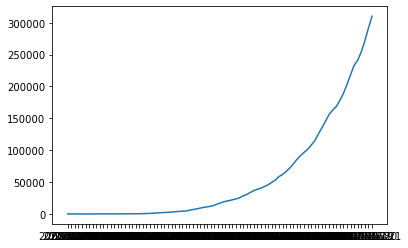

In [17]:
x = brasil_tratado['data']
y = brasil_tratado['casosAcumulado']

plt.plot(x,y)

Tem muitos dias, fica bem inlegivel. Vou colocar pra visualizar de quatro em quatro dias

([<matplotlib.axis.XTick at 0x19820c119d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

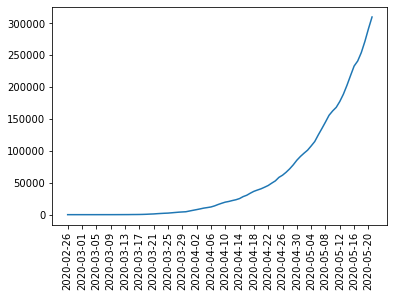

In [20]:
x = brasil_tratado['data']
y = brasil_tratado['casosAcumulado']

#usei iloc pra pedir que percorrece cada linha e trouxesse os resulados de quatro em quatro. Salvei dentro da variavel ticks
ticks = brasil_tratado['data'].iloc[::4]
plt.plot(x,y)
plt.xticks(ticks, rotation = 'vertical')


vou mudar para data aparecer só como dia e mês. Primeiro vou mudar o tipo de dado da coluna para 'datetime'

In [24]:
brasil_tratado['data'] = pd.to_datetime(brasil_tratado['data'])

Agora vou dia e mês

In [26]:
#Uso o strtime para pegar só dia e mês
brasil_tratado['data'] = brasil_tratado['data'].dt.strftime('%d/%m')

Vou plotar o gráfico novamente

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

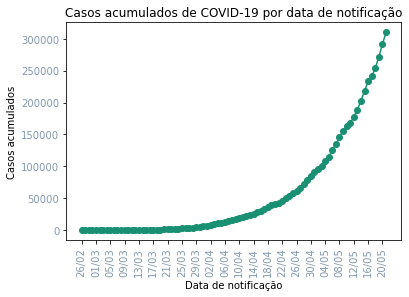

In [36]:
x = brasil_tratado['data']
y = brasil_tratado['casosAcumulado']

ticks = brasil_tratado['data'].iloc[::4]

#"bo-" é pra fazer a linha em formato de bolinhas
plt.plot(x,y, 'bo-', color = '#1A9073')

#colocar titulo no gráfico
plt.xlabel('Data de notificação', color = 'k')
plt.ylabel('Casos acumulados', color = 'k')
plt.title('Casos acumulados de COVID-19 por data de notificação', color = 'k')

plt.xticks(ticks, rotation = 'vertical', color = '#8498AE')
plt.yticks(color = '#8498AE')